# HCC Classification

###### March to April, 2020

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

In [2]:
############################ TASK 1 ############################

df_train = pd.read_csv('hcc_train.csv') # has no ID col, no col names, has class col
df_train.shape
df_train.columns

df_test = pd.read_csv('hcc_test.csv')  # has ID col for result submission, no class col
df_test.shape
df_test.columns

df = pd.read_csv('hcc-data-complete-balanced.csv') # has no ID, has col names, has class col
df.shape
df.columns

# replace training set column names by the column names of the complete set since they have the same columns arranged in the same order
# change training set column names
df_train.columns = df.columns 

# change testing set column names
colnames = ['id']
for cols in list(df.columns[:-1]):
    colnames.append(cols)
df_test.columns = colnames  

In [3]:
#1. Identify the dataset columns into nominal, categorical, continues etc. categories


In [4]:
#2. Use dataframe.info and dataframe.describe to get the insights about the data.
df_train.info
df_train.describe

df_test.info
df_test.describe

<bound method NDFrame.describe of      id  Gender  Symptoms  Alcohol  HBsAg  HBeAg  HBcAb  HCVAb  Cirrhosis  \
0     5       1       0.0        1    0.0    NaN    0.0    0.0          1   
1     9       1       1.0        1    0.0    0.0    0.0    0.0          1   
2    17       1       1.0        1    0.0    0.0    0.0    0.0          1   
3    23       1       1.0        1    0.0    0.0    0.0    0.0          1   
4    26       1       1.0        1    NaN    NaN    NaN    1.0          1   
5    29       1       1.0        1    0.0    NaN    0.0    0.0          1   
6    30       1       1.0        1    1.0    0.0    NaN    0.0          1   
7    33       1       1.0        1    0.0    NaN    0.0    0.0          1   
8    41       1       0.0        0    0.0    0.0    1.0    0.0          1   
9    43       1       0.0        1    NaN    NaN    NaN    NaN          1   
10   44       0       0.0        0    0.0    0.0    1.0    1.0          1   
11   46       0       1.0        0    0.0 

In [5]:
#3. Find the number of null values for each columns
df_train.isnull().sum(axis=0)
df_test.isnull().sum(axis=0)

id                 0
Gender             0
Symptoms           5
Alcohol            0
HBsAg              7
HBeAg             14
HBcAb             10
HCVAb              1
Cirrhosis          0
Endemic           11
Smoking           13
Diabetes           2
Obesity            4
Hemochro           7
AHT                1
CRI                1
HIV                4
NASH               7
Varices           14
Spleno             5
PHT                2
PVT                2
Metastasis         2
Hallmark           1
Age                0
Grams_day         15
Packs_year        17
PS                 0
Encephalopathy     0
Ascites            0
INR                1
AFP                2
Hemoglobin         1
MCV                1
Leucocytes         1
Platelets          1
Albumin            3
Total_Bil          2
ALT                1
AST                1
GGT                1
ALP                1
TP                 4
Creatinine         1
Nodule             1
Major_Dim          8
Dir_Bil           17
Iron         

In [6]:
#4. Know about the patients (Example of analysis for ages)
#a. Find the oldest person 
np.max(df_train.Age)
np.max(df_test.Age)

#b. Find the youngest person
np.min(df_train.Age)
np.min(df_test.Age)

#c. Find the average age group
round(np.mean(df_train.Age))
round(np.mean(df_test.Age))

#d. Find median age 
np.median(df_train.Age)
np.median(df_test.Age)

64.0

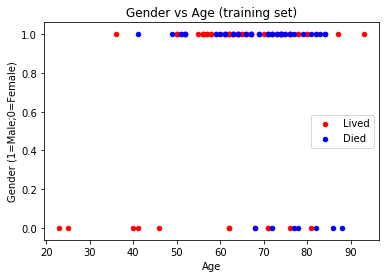

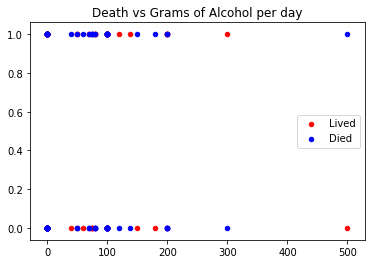

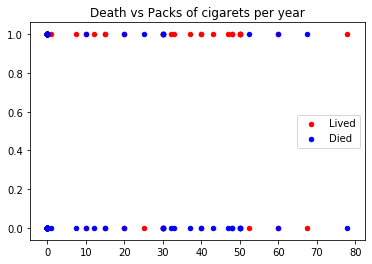

In [7]:
#e. Find the relationship between the deaths and ages(the class column is your prediction variable)
# some scatter plots
plt.scatter(df_train.Age[df_train.Class == 1], df_train.Gender[df_train.Class == 1], s = 20, c = 'r')
plt.scatter(df_train.Age[df_train.Class == 0], df_train.Gender[df_train.Class == 0], s = 20, c = 'b')
plt.legend(['Lived', 'Died'], loc = 7)
plt.title('Gender vs Age (training set)')
plt.xlabel('Age')
plt.ylabel('Gender (1=Male;0=Female)')
plt.show()

plt.scatter(df_train.Grams_day, df_train.Class == 1, s = 20, c = 'r')
plt.scatter(df_train.Grams_day, df_train.Class == 0, s = 20, c = 'b')
plt.legend(['Lived', 'Died'])
plt.title('Death vs Grams of Alcohol per day')
plt.show()

plt.scatter(df_train.Packs_year, df_train.Class == 1, s = 20, c = 'r')
plt.scatter(df_train.Packs_year, df_train.Class == 0, s = 20, c = 'b')
plt.legend(['Lived', 'Died'])
plt.title('Death vs Packs of cigarets per year')
plt.show()

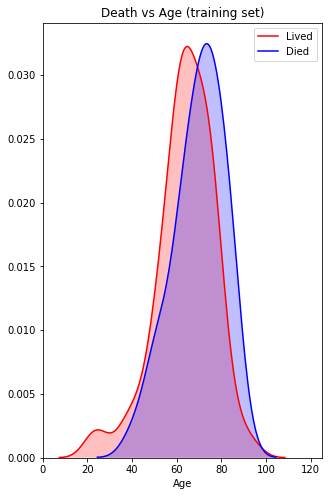

In [8]:
# more plots
####### Death vs Grams of Age #######
plt.figure(figsize=(5,8))
sns.kdeplot(
        df_train.Age[df_train.Class == 1],
        color = 'red',
        shade = True
        )

sns.kdeplot(
        df_train.Age[df_train.Class == 0],
        color = 'blue',
        shade = True
        )

plt.legend(['Lived', 'Died'])
plt.title('Death vs Age (training set)')
plt.xlabel('Age')
plt.ylabel('')
plt.xlim(0, 125)
plt.show()

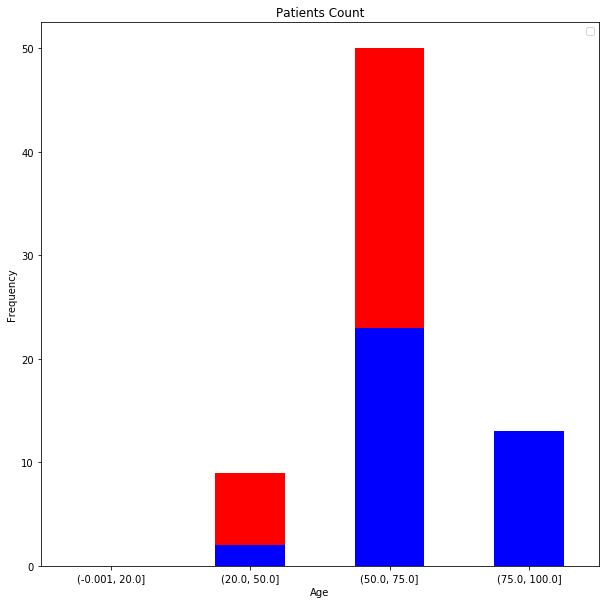

In [9]:
#f. Find the age groups whose survival rate is the largest 
bins = [0, 20, 50, 75, 100]
plt.legend(['Lived', 'Died'])
plt.title('Patients Count')
plt.xlabel('Age')
plt.ylabel('Frequency')

out = pd.cut(df_train.Age[df_train.Class == 1], bins = bins, include_lowest = True)
ax = out.value_counts(sort = False).plot.bar(rot = 0, color = 'r', figsize = (10,10))
out = pd.cut(df_train.Age[df_train.Class == 0], bins = bins, include_lowest = True)
ax = out.value_counts(sort = False).plot.bar(rot = 0, color = 'b', figsize = (10,10))

# ANS: the highest survival rate by age group is 20 to 50

C:\Users\ytjya\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\ytjya\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


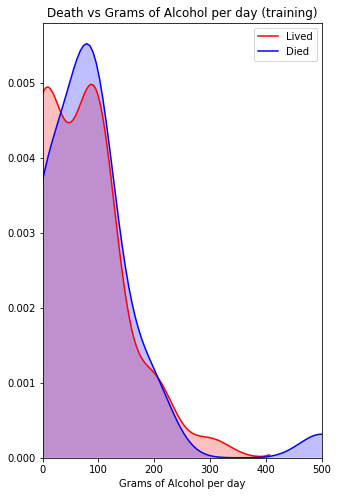

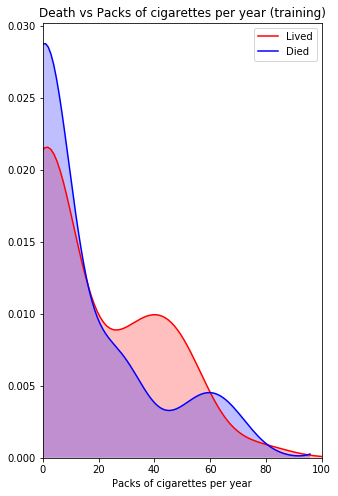

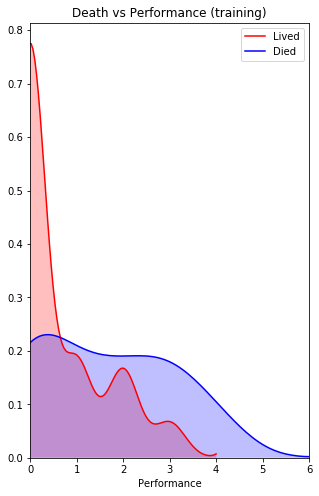

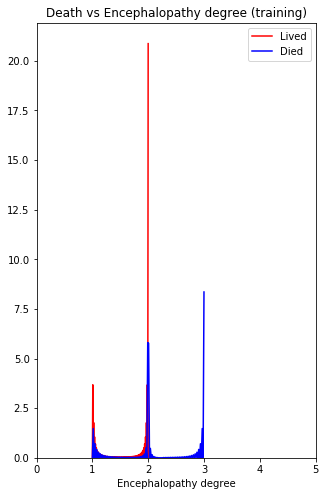

In [10]:
#g. Find similar relationships for at least 3-4 columns that you think can play a role in prediction
#   (For example, Sex, alcohol consumption, etc.)

####### Death vs Grams of Alcohol per day #######

plt.figure(figsize=(5,8))
sns.kdeplot(
        df_train.Grams_day[df_train.Class == 1],
        color = 'red',
        shade = True
        )

sns.kdeplot(
        df_train.Grams_day[df_train.Class == 0],
        color = 'blue',
        shade = True
        )

plt.legend(['Lived', 'Died'])
plt.title('Death vs Grams of Alcohol per day (training)')
plt.xlabel('Grams of Alcohol per day')
plt.ylabel('')
plt.xlim(0, np.max(df_train.Grams_day))
plt.show()

####### Death vs Packs of cigarets per year #######

plt.figure(figsize=(5,8))
sns.kdeplot(
        df_train.Packs_year[df_train.Class == 1],
        color = 'red',
        shade = True
        )

sns.kdeplot(
        df_train.Packs_year[df_train.Class == 0],
        color = 'blue',
        shade = True
        )

plt.legend(['Lived', 'Died'])
plt.title('Death vs Packs of cigarettes per year (training)')
plt.xlabel('Packs of cigarettes per year')
plt.ylabel('')
plt.xlim(0, 100)
plt.show()

####### Death vs Performance #######

plt.figure(figsize=(5,8))
sns.kdeplot(
        df_train.PS[df_train.Class == 1],
        color = 'red',
        shade = True
        )

sns.kdeplot(
        df_train.PS[df_train.Class == 0],
        color = 'blue',
        shade = True
        )

plt.legend(['Lived', 'Died'])
plt.title('Death vs Performance (training)')
plt.xlabel('Performance')
plt.ylabel('')
plt.xlim(0, 6)
plt.show()

####### Death vs Gender #######

plt.figure(figsize=(5,8))
sns.kdeplot(
        df_train.Encephalopathy[df_train.Class == 1],
        color = 'red',
        shade = True
        )

sns.kdeplot(
        df_train.Encephalopathy[df_train.Class == 0],
        color = 'blue',
        shade = True
        )

plt.legend(['Lived', 'Died'])
plt.title('Death vs Encephalopathy degree (training)')
plt.xlabel('Encephalopathy degree')
plt.ylabel('')
plt.xlim(0, 5)
plt.show()

C:\Users\ytjya\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\ytjya\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


ValueError: cannot convert float NaN to integer

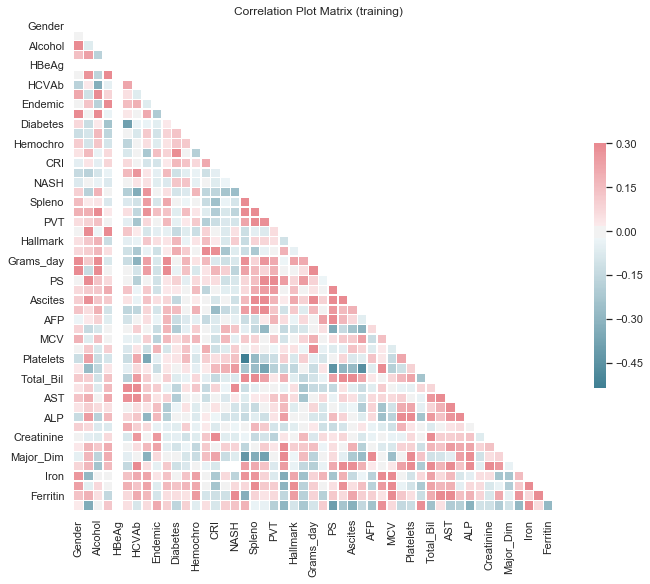

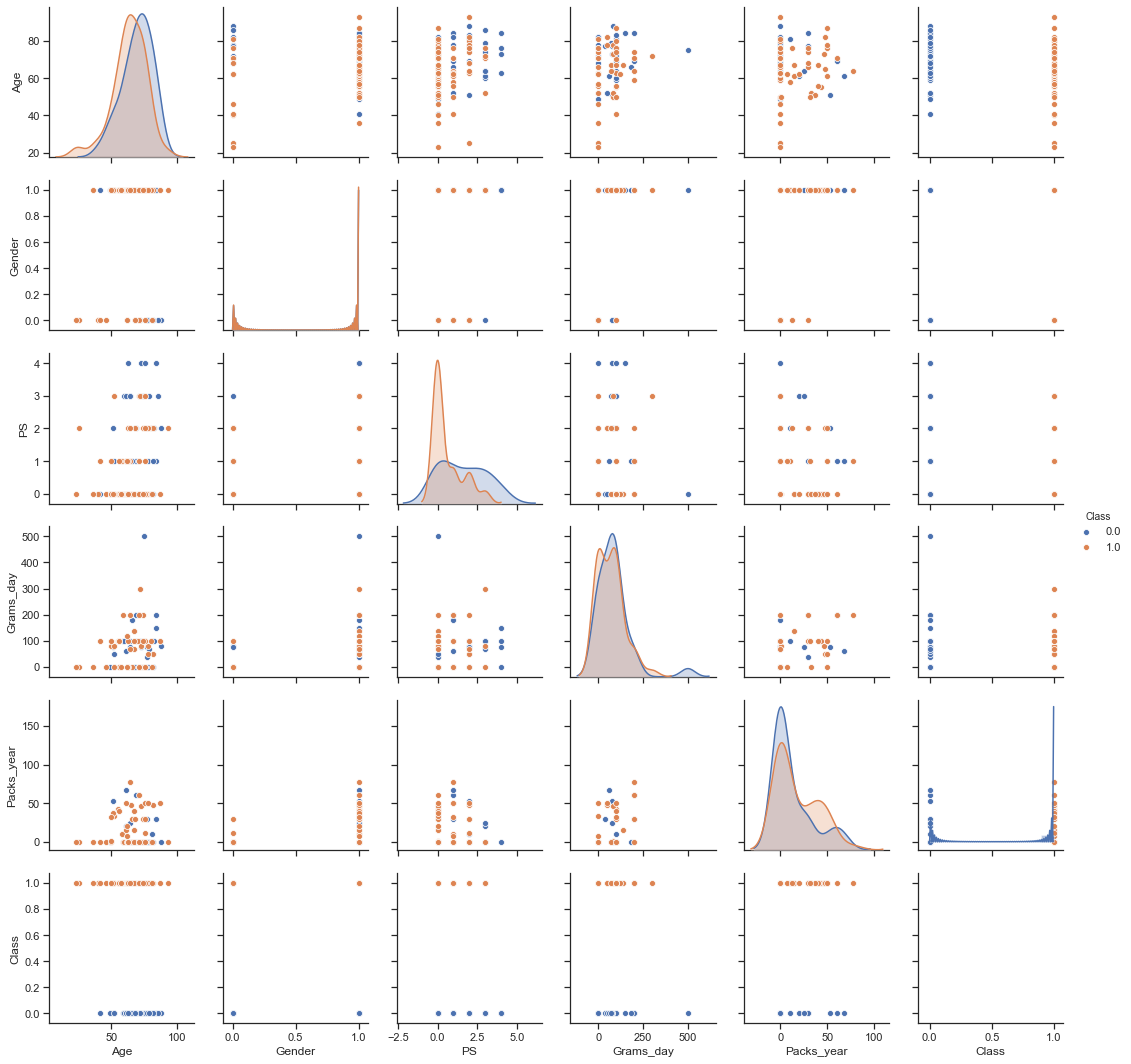

In [11]:
#h. Get more visuals on data distributions

#  i. Use plotCorrelationMatrix
sns.set(style="white")
corr = df_train.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Plot Matrix (training)')

#  ii. plotScatterMatrix
selected_col = pd.DataFrame([df_train.Age, df_train.Gender, df_train.PS, df_train.Grams_day, df_train.Packs_year, df_train.Class])
selected_col = np.transpose(selected_col)
sns.set(style="ticks")
sns.pairplot(selected_col, hue="Class") 

#  iii. plotPerColumnDistribution
for i in df_train.columns:
    sns.distplot(df_train[str(i)])

In [ ]:
#Use information from the plots to get an intuition for selecting feature variables
#i. Find missing values

#  i. Get the count of missing values
df_train.isnull().sum(axis=0)
np.sum(df_train.isnull().sum(axis=0))

df_test.isnull().sum(axis=0)
np.sum(df_test.isnull().sum(axis=0))

In [ ]:
#  ii. Plot a heat map for missing value
sns.heatmap(df_train.isnull(), cbar=False) #cbar set to false since it is binary 
plt.title('Missing value Heatmap (train)')
plt.xlabel('Columns names')
plt.ylabel('Row number')

sns.heatmap(df_test.isnull(), cbar=False)
plt.title('Missing value Heatmap (test)')
plt.xlabel('Columns names')
plt.ylabel('Row number')

In [ ]:
#j. Applying a different technique to handle missing values (For each technique verify your prediction results)

# backing up dataframes
df_train_backup = df_train
df_test_backup = df_test

#  i. Use dropna
df_train_noNaN = df_train.dropna()
df_train_noNaN.shape # dropping na is a disaster

df_test_noNaN = df_test.dropna()
df_test_noNaN.shape # dropping na is a disaster

#  ii. Use replace na with zero or max value
df_train_0NaN = df_train.fillna(0)
df_train_0NaN.shape
df_test_0NaN = df_test.fillna(0) 

#  iii. Use replace na with mean 
df_train_meanNaN = df_train.fillna(df_train.mean())  # Go pandas!
df_test_meanNaN = df_test.fillna(df_test.mean())

#  iv. Search for additional techniques to handle null values,
#       excluding the above three and test. (Include all the techniques that you used in your report.)

# -- Handle Missing Value by Imputation --

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median') # imputaion by median
imputer = imputer.fit(df_train)
df_train_imp = imputer.transform(df_train)
df_train_imp = pd.DataFrame(df_train_imp)
df_train_imp.columns = df.columns

imputer = imputer.fit(df_test)
df_test_imp = imputer.transform(df_test)
df_test_imp = pd.DataFrame(df_test_imp)
df_test_imp.columns = df_test.columns

In [ ]:

#l. Applying the regression models that you think is most suited for this problem.

# ----------------- verify predictions using Random Forest on differently treated missing values ----------------- 
from sklearn.ensemble import RandomForestClassifier
##### l.1 Deleted NaN #####

# deleting all rows that have NaN will result in tiny datasets

X_train = pd.DataFrame(df_train_noNaN.iloc[:, 0:-1])
#X_train = np.transpose(X_train)
X_train.shape

y_train = df_train_noNaN.Class[X_train.index]
y_train.shape

X_test = df_test_noNaN.iloc[:, 1:] # drop ID column
X_test.shape

# fitting
classifier = RandomForestClassifier(bootstrap = True, n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

#accuracy score
classifier.score(X_train, y_train)
 
# Predicting the Test set results
y_pred_noNaN = classifier.predict(X_test)  # prediction
print(y_pred_noNaN)

##### l.2 Replace NaN by 0 #####
#num = np.random.choice(range(df_train.shape[0]), df_test.shape[0], replace = True)  # bootstrap sampling

#help(np.random.choice)
X_train = df_train_0NaN.iloc[:, 0:-1]
y_train = df_train_0NaN.Class
X_test = df_test_0NaN.iloc[:, 1:]

# fitting
classifier = RandomForestClassifier(bootstrap = True, n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

#accuracy score
classifier.score(X_train, y_train)

# Predicting the Test set results
y_pred_0NaN = classifier.predict(X_test)  # prediction


##### l.3 Replace NaN by mean ##### 
#num = np.random.choice(range(df_train.shape[0]), df_test.shape[0], replace = True)  # bootstrap sampling

X_train = df_train_meanNaN.iloc[:, 0:-1]
y_train = df_train_meanNaN.Class
X_test = df_test_meanNaN.iloc[:, 1:]

# fitting
classifier = RandomForestClassifier(bootstrap = True, n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

#accuracy score
classifier.score(X_train, y_train)

# Predicting the Test set results
y_pred_meanNaN = classifier.predict(X_test)  # prediction


## l.4 imputate NaN by with median (this step overlaps with applying random forest model)

# all the classification models below will use imputed training and testing datasets by median
X_train = df_train_imp.iloc[:, 0:-1]
y_train = df_train_imp.Class
X_test = df_test_imp.iloc[:, 1:]

In [ ]:
################################## Applying Regression Models ##################################
# ----------------- Random Forest ----------------- 

# fitting
classifier_RF = RandomForestClassifier(bootstrap = True, n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier_RF.fit(X_train, y_train)

# accuracy score on training set 
classifier_RF.score(X_train, y_train)  
RF_accuracy = round(classifier_RF.score(X_train, y_train) * 100, 2) # 100% accuracy.
RF_accuracy

# Predicting
y_pred_RF = classifier_RF.predict(X_test)  # prediction (this is used for submission)


# ----------------- Decision Tree ----------------- 
from sklearn.tree import DecisionTreeClassifier

# fitting
classifier_DT = DecisionTreeClassifier()
classifier_DT.fit(X_train, y_train)

# accuracy score on training set
DT_accuracy = round(classifier_DT.score(X_train, y_train) * 100, 2) # 100% accuracy.
DT_accuracy

# predicting
y_pred_DT = classifier_DT.predict(X_test)


# ----------------- Naive Bayes ----------------- 
from sklearn.naive_bayes import GaussianNB

# fitting
classifier_NB = GaussianNB()
classifier_NB.fit(X_train, y_train)

# accuracy score on training set
NB_accuracy = round(classifier_NB.score(X_train, y_train) * 100, 2)
NB_accuracy

# predicting
Y_pred_NB = classifier_NB.predict(X_test)


# ----------------- SVM ----------------- 
from sklearn.svm import SVC

# fitting
classifier_SVC = SVC()
classifier_SVC.fit(X_train, y_train)

# accuracy score on training set
SVC_accuracy = round(classifier_SVC.score(X_train, y_train) * 100, 2)
SVC_accuracy

# predicting
Y_pred_SVC = classifier_SVC.predict(X_test)


#m. At least one of the models used to compute should be your own implementation using NumPy.

# ----------------- Logistic Regression (mannual implementation) ----------------- 
from sklearn.linear_model import LogisticRegression

# fitting
classifier_log = LogisticRegression()
classifier_log.fit(X_train, y_train)

# accuracy score on training set
log_accuracy = round(classifier_log.score(X_train, y_train) * 100, 2)
log_accuracy

# predicting
Y_pred_log = classifier_log.predict(X_test)


# ----------------- Perceptron ----------------- 
from sklearn.linear_model import Perceptron

# fitting
classifier_P = Perceptron(max_iter=5)
classifier_P.fit(X_train, y_train)

# accuracy score on training set
P_accuracy = round(classifier_P.score(X_train, y_train) * 100, 2)
P_accuracy

# predicting
Y_pred_P = classifier_P.predict(X_test)

# ----------------- SGD ----------------- 
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier

# fitting
classifier_SGD = linear_model.SGDClassifier(max_iter=5, tol=None)
classifier_SGD.fit(X_train, y_train)

# accuracy score on training set
SGD_accuracy = round(classifier_SGD.score(X_train, y_train) * 100, 2)
SGD_accuracy

# predicting
Y_pred_SGD = classifier_SGD.predict(X_test)


# ----------------- KNN ----------------- 
from sklearn.neighbors import KNeighborsClassifier

# fitting
classifier_KNN = KNeighborsClassifier(n_neighbors = 3)
classifier_KNN.fit(X_train, y_train)

# accuracy score on training set
KNN_accuracy = round(classifier_KNN.score(X_train, y_train) * 100, 2)
KNN_accuracy

# predicting
Y_pred_KNN = classifier_KNN.predict(X_test)


## TABLE 1. model accuracy scores in percent
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [SVC_accuracy, KNN_accuracy, log_accuracy, RF_accuracy, 
              NB_accuracy, P_accuracy, SGD_accuracy, DT_accuracy]})
    
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

In [ ]:
#m. At least one of the models used to compute should be your own implementation using NumPy.
# ----------------- Logistic Regression (mannual implementation) -----------------

############### Functions ###############
def genWeight(n, a, b):
    """This function generates n uniformly distributed weights from a to b then transpose the matrix
        n = number of weights
        a = lower bound of uniformly distributed interval
        b = upper bound of uniformly distributed interval
    """
    w = []
    for i in range(n):                    # n feature columns, n weights, no noise
        w.append(np.random.uniform(a,b))     # randomly generate uniformly distributed w's
    w = np.reshape(w, (n, 1))             # reshape it to n by 1 to do dot product w/ x
    return w
# end of genWeight()
    
def H(X, w):  # Hypothesis function:  H(X)= 1/(1+exp{transpose(w)X}
    """This func returns a list of values of a logistic regression H function, H(X)
        X = the predictor matrix.
        p = vector of dot product of X and w
        w = weight
        r = number of observations
        n,a,b see genWeights()
    """
    r = X.shape[0]
    h = []                   
    for i in range(r):          # iterations depends on number of observations
        p = X[i].dot(w)         # ith obs. dot weight
        h.append( 1 / (1 + np.math.e**(-p)) )    # list of probability from H function
    return h


#end of H()

def costF(X, y, w, h):
    """gradient descend for logistic function: 
        X = predictor matrix    m by # of feature cols
        y = response matrix   m by 1
        m = number of observations
        cost(w) = J(w) = (-1/m)*sum( y_i*log(h_w(x_i)) + (1-y_i)log(1 - h_w(x_i)) )
    """
        #cost += y[i]*math.log(H(X)[i], math.e) + (1-y[i])*math.log((1 - H(X)[i]), math.e)
    r = X.shape[0]
    cost = 0                     # initialize cost variable
    for i in range(r):
        if y[i] == 1:            # calculate cost if y = 1
            cost += np.math.log(h[i])        # log(h_w(x_i)) if y = 1
        elif y[i] == 0:          # calculate cost if y = 0
            cost += np.math.log((1 - h[i]))  # log(1 - h_w(x_i)) if y = 0
        else:
            pass

    return -1*cost/r                # returns the average cost
# end of costF()

def dCostF(X, y, w, h):
    """This function returns the partial derivative of the cost function with respect to 
        each weight, theta_i, in the n by 1 W matrix.
        X = predictor matrix    m by # of feature cols
        y = response matrix   m by 1
        h = H(X)
        r = number of observations
        c = number of features
        partial derivative:  (h_theta(x_i) - y_i) * x_i_j
    """
    r = X.shape[0]
    c = X.shape[1]
    value = 0
    for i in range(r):
        for j in range(c):
            value += (h[i] - y[i]) * X[i][j]  # partial derivative of theta_j 
    
    return float(value/r)      # return the average
# end of dCostf()

def gradDLogistic(X, y, w, h, alpha, runs):
    """This function performs gradient descend to estimate weight for logistic regression
        w = weight
        n, a, b:  see genWeight()
        alpha = learning rate
        X, y: X predictor and response matrix, respectively. see costF() and dCostF()        
        GradientDescend: theta_j := theta_j - alpha * partial_w_j ( J(theta) )
    """
    theta = w
    for i in range(runs):                           # number of iterations for gradient descend
        h = H(X, theta)                             # update hypothesis function, H(X)
        h_range = (min(h), max(h))                  # update interval of probabilities from H(X)
        #j = costF(X, y, theta, h)                   # update cost function
        dj = dCostF(X, y, theta, h)                 # update partial derivatives
        theta = theta - alpha * dj                  # update weight
        #print("iteration: {} , J(W): {}, dJ(W): {}\nprobability range: {} \nw: \n{}".format(i,j,dj,h_range,theta))

    return theta                                    # return list of approximated weights
# end of gradDLogistic()

############### End of Functions ############### 
############### main() ############### 
X = np.array(df_train_imp.iloc[:, 0:-1])
y = np.array(df_train_imp.Class)     # resposne col

w = genWeight(X.shape[1], -1, 1)     # generate a 2 by 1 weight matrix randomly and uniformly from -1 to 1
h = H(X, w)                    # list of probabilities from hypothesis function using random weights
print("The current range of probabilities from Hypothesis function:", min(h), max(h))
theta = gradDLogistic(X,y,w,h,0.01,1000) #1000 iterations to approximate the optimal weight parameters, theta
 print(theta)
# Plot your hypothesis function that classifies the dataset

z = X.dot(theta)              # vector of values Theta*X
print("range of z", min(z), max(z))         
h_final = 1/(1+np.math.e**(-z))  # a list of probabilities produced by H(W, theta) 

# plot hypothesis function using approximated weight parameters
print("probability = 0.5 in H(X,theta) with approximated theta is: " + str(0.5 in h_final))
pred = []
for prob in h_final:
    if prob > 0.5:            # since 0.5 Not in H(X, theta), >0.5 is 1 and <0.5 is 0
        pred.append(1)        # > 0.5, it's 1
    else:
        pred.append(0)        # < 0.5, it's 0

pred = np.reshape(pred, (len(pred)))
print('\n')
correct = list(pred - y).count(0) # number of correct prediction  # 0-0 and 1-1 are correct predictions
print("The number of correct prediction is:", correct, "out of", X.shape[0], "observations.")
print("The accuracy is " + str(int(correct/X.shape[0]*100)) + "%.")

In [ ]:
#n. Upload your test data ​predictions​ to Kaggle competition in the correct submission format. 

# Submission
submission = pd.DataFrame({'id': df_test.id, 'answer': y_pred_RF})
submission

submission.to_csv(r'hcc_submission_Yuntian_Yang.csv', index = False)

In [ ]:
############################ TASK 2 ############################

df = pd.read_csv('hcc-data-complete-balanced.csv') # has no ID, has class col
df.shape
df.columns

# replace ',' by '.' in all columns
for cols in df.columns:
    for j in range(len(cols)):
        if type(df[cols][j]) == str:
            df[cols] = df[cols].str.replace(',','.').astype(float)


#1. Split the dataset in train and test samples
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(df.iloc[:, 0:-1], df.Class, test_size =.265, random_state = 0) # 27% split so test sets have the same size in task 1 & 2

#2. Applying the regression model that you think is most suited for this problem.
# random forest is the most suitable
# ----------------- Random Forest ----------------- 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(bootstrap = True, n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(Xtrain, Ytrain)
classifier.score(Xtrain, Ytrain)

Xtrain.shape
Xtest.shape
# Predicting the Test set results
y_pred = classifier.predict(Xtest)

#3. Compare your prediction result with the first technique.
#   Comparison technique​:  We will use confusion matrix to evaluate the performance Compute Precision,
#   Recall and F1 score for both Task 1 and Task 2

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Ytest, y_pred)
cm

# Precision = true pos/ (true pos + false pos)
pre = cm[1][1]  / ( cm[1][1] + cm[0][1]) 
# Recall score = true pos / (true pos + false neg)
recal = cm[1][1] / ( cm[1][0] + cm[1][1] )
# F1 Score = 2*Precision*Recall / (Precision + Recall)
F1 = 2*pre*recal / (pre+recal)
pre,recal,F1

# confusion matrix for TASK1
cm1 = confusion_matrix(Ytest, y_pred_RF)
cm1
# Precision = true pos/ (true pos + false pos)
pre_1 = cm1[1][1]  / ( cm1[1][1] + cm1[0][1]) 
# Recall score = true pos / (true pos + false neg)
recal_1 = cm1[1][1] / ( cm1[1][0] + cm1[1][1] )
# F1 Score = 2*Precision*Recall / (Precision + Recall)
F1_1 = 2*pre_1*recal_1 / (pre_1+recal_1)
pre_1,recal_1,F1_1

In [ ]:
############################ TASK 3 ############################
#a. Apply feature transform on the features used in task 1 

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2) # 0.8454545454545455
X_train_transform2 = poly.fit_transform(X_train)
classifier_poly2 = LogisticRegression()
classifier_poly2.fit(X_train_transform2, y_train)
classifier_poly2.score(X_train_transform2, y_train)

poly = PolynomialFeatures(3) # 0.7454545454545455
X_train_transform3 = poly.fit_transform(X_train)
classifier_poly3 = LogisticRegression()
classifier_poly3.fit(X_train_transform3, y_train)
classifier_poly3.score(X_train_transform3, y_train)

poly = PolynomialFeatures(4) # 0.8545454545454545
X_train_transform4 = poly.fit_transform(X_train)
classifier_poly4 = LogisticRegression()
classifier_poly4.fit(X_train_transform4, y_train)
classifier_poly4.score(X_train_transform4, y_train)

poly = PolynomialFeatures(5) # 0.8181818181818182
X_train_transform5 = poly.fit_transform(X_train)
classifier_poly5 = LogisticRegression()
classifier_poly5.fit(X_train_transform5, y_train)
classifier_poly5.score(X_train_transform5, y_train)

#   a. Does varying the polynomial degree change your accuracy?
# Yes, the higher the degree, the less accurate it becomes.

#   b. Can you identify if your model is underfitting or overfitting? 
#      (Hint use cross-validation error and in-sample error plot to identify high bias and
#       high variance.) Plot the relationships

from sklearn.metrics import mean_squared_error

def calc_train_error(X_train, y_train, model):
    '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    mse = mean_squared_error(y_train, predictions)
    rmse = np.sqrt(mse)
    return mse

p2 = calc_train_error(X_train_transform2, y_train, classifier_poly2)
p3 = calc_train_error(X_train_transform3, y_train, classifier_poly3)
p4 = calc_train_error(X_train_transform4, y_train, classifier_poly4)
p5 = calc_train_error(X_train_transform5, y_train, classifier_poly5)

plt.plot(np.linspace(2,5,4),[p2,p3,p4,p5])
plt.title('In-sample error vs degree')
plt.xlabel('degree')
plt.ylabel('In-sample error')

from sklearn.model_selection import cross_validate
cross_validate()
c2 = cross_validate(classifier_poly2, X_train_transform2, y_train, cv=3)
c3 = cross_validate(classifier_poly3, X_train_transform3, y_train, cv=3)
c4 = cross_validate(classifier_poly4, X_train_transform4, y_train, cv=3)
c5 = cross_validate(classifier_poly5, X_train_transform5, y_train, cv=3)
c2,c3,c4,c5
# shows degree 2 has highest train score and egree 4 has highest test score
# degree 4 might be the best choice since it has the least in-sample error and the highest test_score.